In [1]:
import numpy as np
import scipy
import pandas
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('white')
sns.set_style('ticks')
sns.set_context('notebook')
import h5py
import allel; print('scikit-allel', allel.__version__)

scikit-allel 1.2.1


In [3]:
#allel.vcf_to_hdf5('/wrk/Gen_Tree/GenTree_Genome_mapping/Betula_pendula/Bpendula_GM_Oulu_filtered_v2.vcf', '/wrk/Gen_Tree/GenTree_Genome_mapping/Betula_pendula/Bpendula_GM_Oulu_filtered_v2.h5', fields='*', overwrite=True)

In [4]:
callset_fn = '/wrk/Gen_Tree/GenTree_Genome_mapping/Betula_pendula/Bpendula_GM_Oulu_filtered_v2.h5'
callset = h5py.File(callset_fn, mode='r')
callset

<HDF5 file "Bpendula_GM_Oulu_filtered_v2.h5" (mode r)>

In [5]:
sorted(callset.keys())

['calldata', 'samples', 'variants']

In [6]:
calldata = callset['calldata']

In [7]:
calldata

<HDF5 group "/calldata" (10 members)>

In [8]:
list(calldata)

['AD', 'DP', 'GQ', 'GT', 'MIN_DP', 'PGT', 'PID', 'PL', 'RGQ', 'SB']

In [9]:
variants = callset['variants']
variants

<HDF5 group "/variants" (36 members)>

In [10]:
variants = allel.VariantChunkedTable(callset['variants'], 
                                     names=['POS', 'REF', 'ALT', 'DP', 'QUAL', 'AN', 'MQ', 'QD', 'SOR', 'MQRankSum', 'ReadPosRankSum', 'numalt'])
variants

<VariantChunkedTable shape=(355405,) dtype=[('POS', '<i4'), ('REF', 'O'), ('ALT', 'O', (3,)), ('DP', '<i4'), ('QUAL', '<f4'), ('AN', '<i4'), ('MQ', '<f4'), ('QD', '<f4'), ('SOR', '<f4'), ('MQRankSum', '<f4'), ('ReadPosRankSum', '<f4'), ('numalt', '<i4')]
   nbytes=24.4M cbytes=8.6M cratio=2.8
   values=h5py._hl.group.Group>

In [11]:
genotypes = allel.GenotypeChunkedArray(calldata['GT'])
genotypes

<GenotypeChunkedArray shape=(355405, 507, 2) dtype=int8 chunks=(65536, 64, 2)
   nbytes=343.7M cbytes=25.4M cratio=13.5
   compression=gzip compression_opts=1
   values=h5py._hl.dataset.Dataset>

In [12]:
ac = genotypes.count_alleles()
ac

<AlleleCountsChunkedArray shape=(355405, 2) dtype=int32 chunks=(44426, 2)
   nbytes=2.7M cbytes=786.5K cratio=3.5
   compression=blosc compression_opts={'cname': 'lz4', 'clevel': 5, 'shuffle': 1, 'blocksize': 0}
   values=zarr.core.Array>

In [13]:
s = allel.sfs_folded(ac)
s

array([   75, 84049, 37575, 21968, 15672, 12427,  9851,  8266,  6856,
        5971,  5275,  4654,  4111,  3878,  3666,  3407,  3173,  2844,
        2661,  2578,  2470,  2259,  2155,  2005,  1987,  1895,  1903,
        1735,  1619,  1661,  1548,  1471,  1370,  1409,  1279,  1248,
        1254,  1234,  1149,  1206,  1115,  1033,  1030,   971,   943,
         901,   830,   864,   916,   801,   809,   792,   785,   750,
         764,   761,   752,   673,   614,   632,   599,   642,   593,
         596,   585,   652,   659,   624,   584,   572,   618,   504,
         522,   480,   484,   450,   496,   437,   454,   461,   456,
         490,   516,   444,   416,   417,   431,   393,   370,   382,
         356,   344,   380,   377,   373,   361,   368,   364,   342,
         342,   328,   332,   276,   285,   329,   283,   288,   285,
         268,   284,   282,   296,   321,   267,   291,   296,   263,
         268,   272,   292,   256,   291,   256,   267,   236,   239,
         218,   239,

In [11]:
samples = callset['samples']
samples = list(samples)
samples

['CH-BP-05-01',
 'CH-BP-05-02',
 'CH-BP-05-03',
 'CH-BP-05-04',
 'CH-BP-05-05',
 'CH-BP-05-06',
 'CH-BP-05-07',
 'CH-BP-05-08',
 'CH-BP-05-09',
 'CH-BP-05-10',
 'CH-BP-05-11',
 'CH-BP-05-12',
 'CH-BP-05-13',
 'CH-BP-05-14',
 'CH-BP-05-15',
 'CH-BP-05-16',
 'CH-BP-05-17',
 'CH-BP-05-18',
 'CH-BP-05-19',
 'CH-BP-05-20',
 'CH-BP-05-21',
 'CH-BP-05-22',
 'CH-BP-05-23',
 'CH-BP-05-24',
 'CH-BP-05-25',
 'CH-BP-06-01',
 'CH-BP-06-02',
 'CH-BP-06-03',
 'CH-BP-06-04',
 'CH-BP-06-05',
 'CH-BP-06-06',
 'CH-BP-06-07',
 'CH-BP-06-08',
 'CH-BP-06-09',
 'CH-BP-06-10',
 'CH-BP-06-11',
 'CH-BP-06-12',
 'CH-BP-06-13',
 'CH-BP-06-14',
 'CH-BP-06-15',
 'CH-BP-06-16',
 'CH-BP-06-17',
 'CH-BP-06-18',
 'CH-BP-06-19',
 'CH-BP-06-20',
 'CH-BP-06-21',
 'CH-BP-06-22',
 'CH-BP-06-23',
 'CH-BP-06-24',
 'CH-BP-06-25',
 'DE-BP-09-01',
 'DE-BP-09-02',
 'DE-BP-09-03',
 'DE-BP-09-04',
 'DE-BP-09-05',
 'DE-BP-09-06',
 'DE-BP-09-07',
 'DE-BP-09-08',
 'DE-BP-09-09',
 'DE-BP-09-11',
 'DE-BP-09-12',
 'DE-BP-09-13',
 'DE-BP-

In [12]:
def plot_variant_hist(f, bins=30):
    x = variants[f][:]
    fig, ax = plt.subplots(figsize=(7, 5))
    sns.despine(ax=ax, offset=10)
    ax.hist(x, bins=bins)
    ax.set_xlabel(f)
    ax.set_ylabel('No. variants')
    ax.set_title('Variant %s distribution' % f)

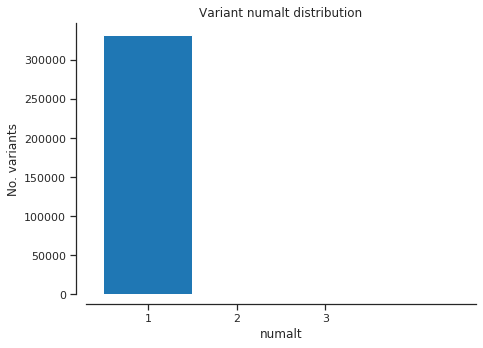

In [13]:
plot_variant_hist('numalt', bins=np.arange(0.5, 5.5, 1))
plt.gca().set_xticks([1,2,3])

/wrk/Programs/miniconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:829: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/wrk/Programs/miniconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:830: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


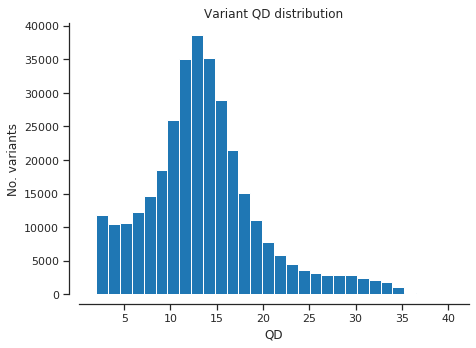

In [14]:
plot_variant_hist('QD')

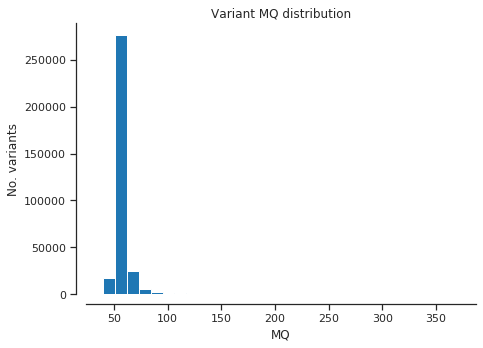

In [14]:
plot_variant_hist('MQ')

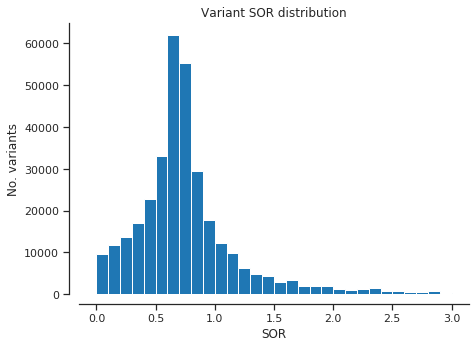

In [16]:
plot_variant_hist('SOR')

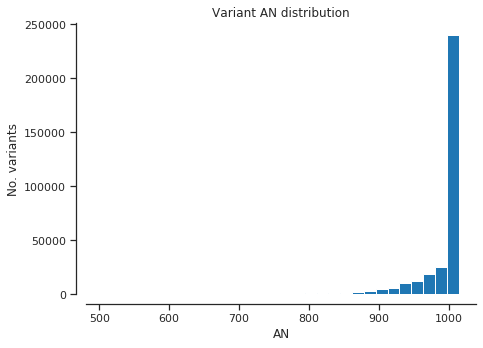

In [15]:
plot_variant_hist('AN')

In [30]:
samples_fn = '/wrk/Gen_Tree/GenTree_Genome_mapping/Betula_pendula/Bpendula_SAMPLES_kept.txt'
samples = pandas.read_csv(samples_fn, sep='\t')
samples.head()

,ID,Population
0,CH-BP-05-01,CH-BP-05
1,CH-BP-05-02,CH-BP-05
2,CH-BP-05-03,CH-BP-05
3,CH-BP-05-04,CH-BP-05
4,CH-BP-05-05,CH-BP-05


In [32]:
samples.Population.value_counts()

YT          33
CH-BP-05    25
SE-BP-17    25
DE-BP-10    25
NO-BP-16    25
GB-BP-14    25
CH-BP-06    25
IT-BP-08    25
FR-BP-04    24
FR-BP-21    24
GB-BP-13    24
FR-BP-03    24
IT-BP-07    24
DE-BP-09    24
ES-BP-02    24
SE-BP-18    23
FI-BP-20    22
LT-BP-11    22
FI-BP-19    22
LT-BP-12    22
NO-BP-15    20
Name: Population, dtype: int64

In [20]:
#sample_selection = samples.Population.isin({'SE-BP-18', 'FR-BP-04', 'IT-BP-07', 'GB-BP-14', 'FI-BP-19', 'CH-BP-06', 'ES-BP-02', 'SE-BP-17', 'NO-BP-15', 'FR-BP-03', 'DE-BP-10', 'FI-BP-20', 'LT-BP-11', 'FR-BP-21', 'NO-BP-16', 'IT-BP-08', 'CH-BP-05', 'LT-BP-12', 'DE-BP-09', 'GB-BP-13'}).values
#sample_selection[:5]

In [17]:
ac = genotypes.count_alleles()
ac

<AlleleCountsChunkedArray shape=(330937, 2) dtype=int32 chunks=(41368, 2)
   nbytes=2.5M cbytes=735.5K cratio=3.5
   compression=blosc compression_opts={'cname': 'lz4', 'clevel': 5, 'shuffle': 1, 'blocksize': 0}
   values=zarr.core.Array>

In [18]:
biallelic = (ac.max_allele() == 1)
###This is the filter expression for biallelic sites

In [19]:
genotypes_subset_1 = genotypes.compress(biallelic)
genotypes_subset_1
###subset the array genotypes_subset by keeping only biallelic sites. 

<GenotypeChunkedArray shape=(330937, 507, 2) dtype=int8 chunks=(1293, 507, 2)
   nbytes=320.0M cbytes=46.6M cratio=6.9
   compression=blosc compression_opts={'cname': 'lz4', 'clevel': 5, 'shuffle': 1, 'blocksize': 0}
   values=zarr.core.Array>

In [20]:
ac = genotypes_subset_1.count_alleles()
ac

<AlleleCountsChunkedArray shape=(330937, 2) dtype=int32 chunks=(41368, 2)
   nbytes=2.5M cbytes=735.5K cratio=3.5
   compression=blosc compression_opts={'cname': 'lz4', 'clevel': 5, 'shuffle': 1, 'blocksize': 0}
   values=zarr.core.Array>

In [33]:
biallelic[:30]

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True, False,  True,  True,  True,
        True,  True,  True])

In [34]:
variants[:24]
#non-biallelic also give False, POS 343 (23 on array biallelic[:30]) has two alternative alleles hence is not biallelic.

<VariantTable shape=(24,) dtype=(numpy.record, [('POS', '<i4'), ('REF', 'O'), ('ALT', 'O', (3,)), ('DP', '<i4'), ('QUAL', '<f4'), ('AN', '<i4'), ('MQ', '<f4'), ('QD', '<f4'), ('SOR', '<f4'), ('MQRankSum', '<f4'), ('ReadPosRankSum', '<f4'), ('numalt', '<i4')])>
[( 12, 'T', ['C', '', ''],   730, 4.80310e+02, 588,  42.94, 22.87, 2.636, 0., -1.036, 1)
 ( 55, 'A', ['T', '', ''],  1414, 2.03290e+02, 776,  57.55, 10.7 , 0.072, 0.,  0.   , 1)
 ( 58, 'A', ['T', '', ''],  1479, 1.99350e+02, 784,  55.95, 18.12, 1.609, 0., -0.21 , 1)
 ( 80, 'G', ['A', '', ''],  1841, 3.86544e+04, 730,  58.59, 26.49, 0.288, 0.,  0.   , 1)
 ( 88, 'T', ['A', '', ''],  1955, 3.14200e+02, 854,  53.98, 18.48, 0.481, 0.,  0.135, 1)
 (103, 'A', ['G', '', ''],  2255, 1.98040e+02, 884,  61.64, 13.2 , 0.693, 0.,  1.8  , 1)
 (122, 'C', ['A', '', ''],  2715, 6.27028e+04, 836,  59.23, 27.26, 0.878, 0.,  0.   , 1)
 (124, 'C', ['A', '', ''],  2798, 3.39800e+01, 914, 161.55, 33.98, 0.014, 0.,  1.46 , 1)
 (131, 'T', ['C', 'G', ''],  2920, 1.19605e+04, 902,  59.29, 19.87, 1.136, 0., -0.135, 2)
 (133, 'T', ['C', '', ''],  3005, 3.06704e+03, 912,  59.08, 13.39, 0.81 , 0.,  0.385, 1)
 (134, 'G', ['A', '', ''],  3066, 7.08230e+02, 918,  65.92, 14.45, 0.269, 0., -0.431, 1)
 (150, 'C', ['T', '', ''],  3487, 6.78300e+01, 928,  60.  , 11.3 , 1.329, 0.,  0.   , 1)
 (176, 'T', ['C', '', ''],  4440, 1.27881e+03, 930,  60.  , 14.87, 0.446, 0.,  0.   , 1)
 (182, 'C', ['T', '', ''],  4612, 1.53300e+01, 930,  60.  ,  2.19, 0.223, 0., -1.068, 1)
 (222, 'A', ['G', '', ''],  6159, 9.01620e+04, 928,  60.1 , 21.65, 0.622, 0.,  0.   , 1)
 (230, 'A', ['T', '', ''],  6475, 1.92802e+04, 934,  60.19, 15.49, 0.378, 0.,  0.135, 1)
 (232, 'T', ['C', '', ''],  6520, 1.71707e+03, 936,  68.16, 12.01, 1.073, 0., -0.319, 1)
 (269, 'T', ['A', '', ''],  9234, 1.35794e+03, 942,  62.78, 14.6 , 1.523, 0.,  0.   , 1)
 (271, 'G', ['A', '', ''],  9346, 2.36510e+02, 942,  60.  , 16.89, 0.283, 0., -0.063, 1)
 (279, 'A', ['T', '', ''], 10984, 3.68536e+03, 944,  60.  , 14.28, 1.535, 0.,  0.319, 1)
 (296, 'T', ['G', '', ''], 11879, 2.80485e+03, 944,  60.  , 14.61, 0.439, 0., -0.365, 1)
 (300, 'C', ['G', '', ''], 12285, 3.86310e+02, 944,  60.  , 21.46, 0.195, 0., -0.375, 1)
 (312, 'A', ['G', '', ''], 13216, 5.01050e+02, 944,  59.02, 16.7 , 0.155, 0.,  0.476, 1)
 (343, 'A', ['G', 'T', ''], 17140, 2.10823e+03, 944,  60.  ,  7.12, 0.216, 0.,  0.391, 2)]

In [21]:
n_variants = len(genotypes_subset_1)
n_variants

330937

In [22]:
pc_missing = genotypes_subset_1.count_missing(axis=0)[:] * 100 / n_variants
pc_het = genotypes_subset_1.count_het(axis=0)[:] * 100 / n_variants

In [33]:
samples.Population.unique()
###This identifiers come from the metadata file

array(['CH-BP-05', 'CH-BP-06', 'DE-BP-09', 'DE-BP-10', 'ES-BP-02',
       'FI-BP-19', 'FI-BP-20', 'FR-BP-03', 'FR-BP-04', 'FR-BP-21',
       'GB-BP-13', 'GB-BP-14', 'IT-BP-07', 'IT-BP-08', 'LT-BP-11',
       'LT-BP-12', 'NO-BP-15', 'NO-BP-16', 'SE-BP-17', 'SE-BP-18', 'YT'],
      dtype=object)

In [26]:
def plot_genotype_frequency(pc, title):
    fig, ax = plt.subplots(figsize=(24, 5))
    sns.despine(ax=ax, offset=24)
    left = np.arange(len(pc))
    palette = sns.color_palette("hls", 28)
    pop2color = {'LT-BP-12': palette[7],
                 'CH-BP-06': palette[1],
                 'NO-BP-15': palette[2],
                 'FR-BP-03': palette[3],
                 'FI-BP-19': palette[4],
                 'FR-BP-04': palette[5],
                 'FI-BP-20': palette[6],
                 'IT-BP-07': palette[0],
                 'GB-BP-14': palette[8],
                 'GB-BP-13': palette[9],
                 'SE-BP-18': palette[10],
                 'IT-BP-08': palette[11],
                 'LT-BP-11': palette[12],
                 'ES-BP-02': palette[13],
                 'DE-BP-10': palette[14],
                 'FR-BP-21': palette[16],
                 'NO-BP-16': palette[17],
                 'CH-BP-05': palette[18],
                 'DE-BP-09': palette[19],
                 'YT': palette[27],
                 'SE-BP-17': palette[23]}
    colors = [pop2color[p] for p in samples.Population]
    ax.bar(left, pc, color=colors)
    ax.set_xlim(0, len(pc))
    ax.set_xlabel('Sample index')
    ax.set_ylabel('Percent calls')
    ax.set_title(title)
    handles = [mpl.patches.Patch(color=palette[7]),
               mpl.patches.Patch(color=palette[1]),
               mpl.patches.Patch(color=palette[2]),
               mpl.patches.Patch(color=palette[3]),
               mpl.patches.Patch(color=palette[4]),
               mpl.patches.Patch(color=palette[5]),
               mpl.patches.Patch(color=palette[6]),
               mpl.patches.Patch(color=palette[0]),
               mpl.patches.Patch(color=palette[8]),
               mpl.patches.Patch(color=palette[9]),
               mpl.patches.Patch(color=palette[10]),
               mpl.patches.Patch(color=palette[11]),
               mpl.patches.Patch(color=palette[12]),
               mpl.patches.Patch(color=palette[13]),
               mpl.patches.Patch(color=palette[14]),
               mpl.patches.Patch(color=palette[16]),
               mpl.patches.Patch(color=palette[17]),
               mpl.patches.Patch(color=palette[18]),
               mpl.patches.Patch(color=palette[19]),
               mpl.patches.Patch(color=palette[27]),
               mpl.patches.Patch(color=palette[23])]
    ax.legend(handles=handles, labels=['LT-BP-12', 'CH-BP-06', 'NO-BP-15', 'FR-BP-03', 'FI-BP-19',
       'FR-BP-04', 'FI-BP-20', 'IT-BP-07', 'GB-BP-14', 'GB-BP-13',
       'SE-BP-18', 'IT-BP-08', 'LT-BP-11', 'ES-BP-02', 'DE-BP-10',
       'ES-BP-01', 'FR-BP-21', 'NO-BP-16', 'CH-BP-05',
       'DE-BP-09', 'FI-BBU', 'FI-BN','YT','SE-BP-17'], title='Population',
              bbox_to_anchor=(1, 1), loc='upper left')

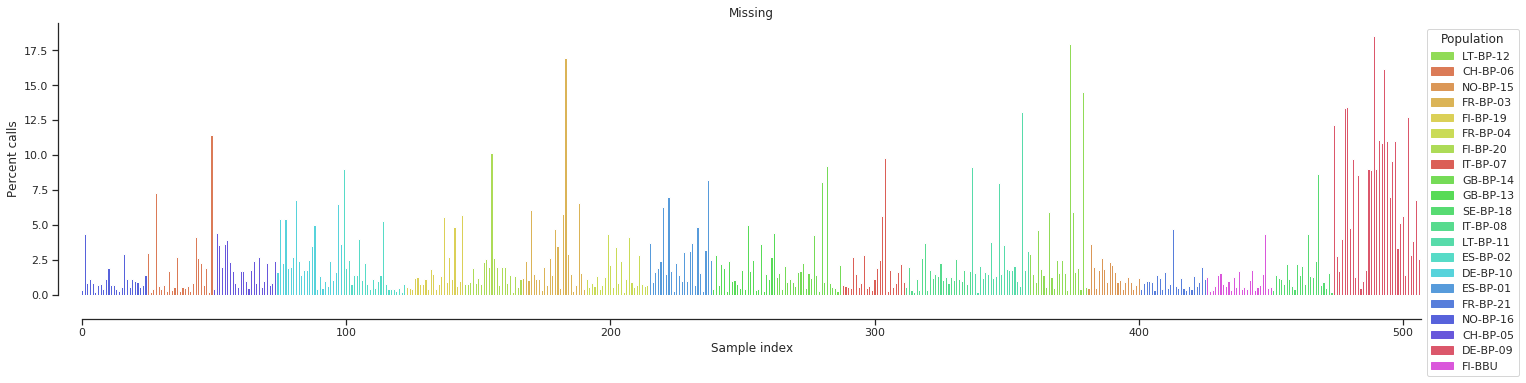

In [31]:
plot_genotype_frequency(pc_missing, 'Missing')

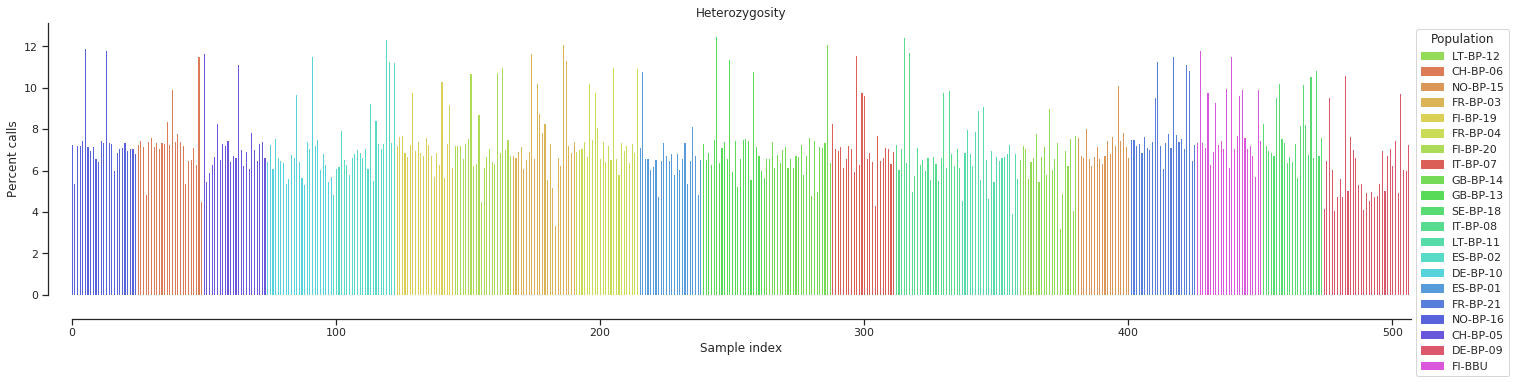

In [34]:
plot_genotype_frequency(pc_het, 'Heterozygosity')

In [35]:
samples

,ID,Population
0,CH-BP-05-01,CH-BP-05
1,CH-BP-05-02,CH-BP-05
2,CH-BP-05-03,CH-BP-05
3,CH-BP-05-04,CH-BP-05
4,CH-BP-05-05,CH-BP-05
...,...,...
502,YT-866,YT
503,YT-867,YT
504,YT-868,YT
505,YT-869,YT


In [36]:
populations = samples.Population.unique()

In [37]:
populations

array(['CH-BP-05', 'CH-BP-06', 'DE-BP-09', 'DE-BP-10', 'ES-BP-02',
       'FI-BP-19', 'FI-BP-20', 'FR-BP-03', 'FR-BP-04', 'FR-BP-21',
       'GB-BP-13', 'GB-BP-14', 'IT-BP-07', 'IT-BP-08', 'LT-BP-11',
       'LT-BP-12', 'NO-BP-15', 'NO-BP-16', 'SE-BP-17', 'SE-BP-18', 'YT'],
      dtype=object)

In [38]:
ac = genotypes_subset_1.count_alleles()
ac

<AlleleCountsChunkedArray shape=(330937, 2) dtype=int32 chunks=(41368, 2)
   nbytes=2.5M cbytes=735.5K cratio=3.5
   compression=blosc compression_opts={'cname': 'lz4', 'clevel': 5, 'shuffle': 1, 'blocksize': 0}
   values=zarr.core.Array>

In [47]:
palette = sns.color_palette("hls",30)
pop_colours = {        
    'CH-BP-05': palette[15], 
    'CH-BP-06': palette[1],
    'DE-BP-09': palette[2], 
    'DE-BP-10': palette[3], 
    'ES-BP-02': palette[5],
    'FI-BP-19': palette[8], 
    'FI-BP-20': palette[17],
    'FR-BP-03': palette[10],
    'FR-BP-04': palette[11],
    'FR-BP-21': palette[12],
    'GB-BP-13': palette[13],
    'GB-BP-14': palette[14],
    'IT-BP-07': palette[0],
    'IT-BP-08': palette[16],
    'LT-BP-11': palette[27],
    'LT-BP-12': palette[18],
    'NO-BP-15': palette[19],
    'NO-BP-16': palette[20],
    'SE-BP-17': palette[21],
    'YT': palette[23],
    'SE-BP-18': palette[22],
         }

In [41]:
def plot_pca_coords(coords, model, pc1, pc2, ax, sample_population):
    sns.despine(ax=ax, offset=5)
    x = coords[:, pc1]
    y = coords[:, pc2]
    for pop in populations:
        flt = (sample_population == pop)
        ax.plot(x[flt], y[flt], marker='o', linestyle=' ', color=pop_colours[pop], 
                label=pop, markersize=6, mec='k', mew=.5)
    ax.set_xlabel('PC%s (%.1f%%)' % (pc1+1, model.explained_variance_ratio_[pc1]*100))
    ax.set_ylabel('PC%s (%.1f%%)' % (pc2+1, model.explained_variance_ratio_[pc2]*100))
    

def fig_pca(coords, model, title, sample_population=None):
    if sample_population is None:
        sample_population = samples.Population.values
    # plot coords for PCs 1 vs 2, 3 vs 4
    fig = plt.figure(figsize=(10, 5))
    ax = fig.add_subplot(1, 2, 1)
    plot_pca_coords(coords, model, 0, 1, ax, sample_population)
    ax = fig.add_subplot(1, 2, 2)
    plot_pca_coords(coords, model, 2, 3, ax, sample_population)
    ax.legend(bbox_to_anchor=(1, 1), loc='upper left')
    fig.suptitle(title, y=1.02)
    fig.tight_layout()

In [42]:
flt = (ac[:, :2].min(axis=1) > 1)
gf = genotypes_subset_1.compress(flt, axis=0)
gn = gf.to_n_alt()
gn

<ChunkedArrayWrapper shape=(253920, 507) dtype=int8 chunks=(1984, 507)
   nbytes=122.8M cbytes=24.5M cratio=5.0
   compression=blosc compression_opts={'cname': 'lz4', 'clevel': 5, 'shuffle': 1, 'blocksize': 0}
   values=zarr.core.Array>

In [43]:
coords1, model1 = allel.pca(gn, n_components=10, scaler='patterson')

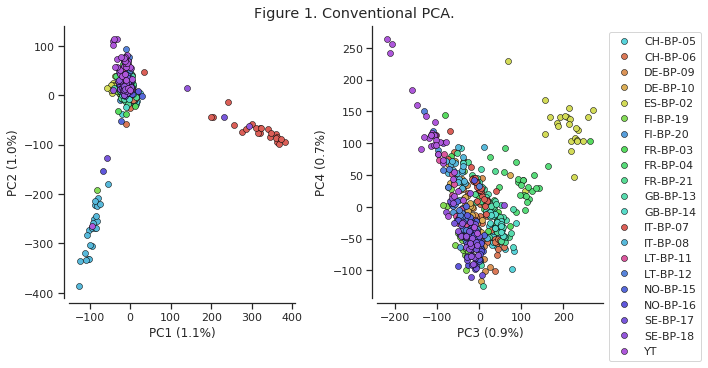

In [48]:
fig_pca(coords1, model1, 'Figure 1. Conventional PCA.')